In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 300 # number of problems
m = 20 # problem types
k = 25 # students


In [3]:
R = np.random.randint(low=0,high=10,dtype='int32',size=[n,k])

In [4]:
# R là kết quả của k students với n problems
R.shape

(300, 25)

In [5]:
# Kết quả của student với i = 10
R[:,10-1]

array([5, 3, 2, 1, 2, 9, 8, 4, 2, 4, 5, 0, 2, 0, 4, 4, 3, 5, 3, 8, 0, 0, 4,
       8, 8, 5, 2, 4, 1, 7, 0, 7, 2, 3, 4, 2, 4, 5, 4, 0, 8, 7, 0, 8, 3, 9,
       3, 1, 8, 1, 2, 1, 3, 9, 2, 5, 8, 6, 3, 8, 8, 4, 0, 7, 8, 3, 1, 4, 7,
       7, 7, 4, 7, 4, 7, 1, 0, 1, 4, 3, 1, 7, 5, 6, 3, 5, 4, 2, 8, 9, 2, 3,
       4, 2, 2, 0, 6, 9, 8, 5, 3, 6, 7, 9, 3, 5, 3, 7, 0, 8, 4, 3, 7, 1, 1,
       2, 4, 2, 0, 0, 0, 4, 7, 3, 5, 4, 1, 9, 5, 8, 4, 0, 0, 3, 1, 2, 4, 1,
       7, 1, 0, 0, 6, 2, 0, 9, 1, 8, 5, 4, 8, 6, 7, 7, 7, 6, 3, 9, 5, 8, 1,
       3, 9, 3, 8, 3, 2, 8, 0, 9, 8, 9, 4, 5, 2, 6, 6, 7, 5, 4, 4, 5, 2, 0,
       4, 0, 5, 6, 7, 4, 5, 3, 7, 4, 0, 9, 4, 7, 7, 9, 8, 4, 9, 1, 8, 5, 2,
       3, 1, 4, 5, 3, 2, 2, 8, 6, 2, 0, 2, 8, 6, 1, 1, 6, 5, 9, 1, 4, 6, 6,
       4, 1, 9, 9, 3, 4, 5, 6, 3, 5, 5, 3, 5, 4, 8, 4, 5, 9, 4, 4, 9, 0, 4,
       8, 4, 0, 0, 1, 6, 9, 5, 4, 2, 7, 8, 9, 2, 1, 1, 1, 9, 0, 1, 8, 4, 3,
       1, 8, 6, 0, 2, 3, 5, 3, 3, 0, 7, 6, 1, 0, 8, 1, 4, 8, 2, 2, 8, 9, 4,
       0])

In [7]:
E = np.ones([1,m]) # Expected : Vector data kì vọng

In [6]:
# Random số bài mỗi dạng :
# tung 1 xúc xắc 20 mặt 300 lần
# số lần xuất hiện của mỗi mặt là số bài mỗi problem type, chance ~ 5%

number_problems_per_type = np.random.multinomial(n=300,pvals=[1.0/m]*m)

In [18]:
# Phân bố 300 problems sang 20 dạng bài :
number_problems_per_type = np.random.random(m)
number_problems_per_type /= number_problems_per_type.sum()
number_problems_per_type *= n

In [19]:
number_problems_per_type

array([  4.53770253,  26.48239113,   7.79287023,   5.28317861,
        23.89141012,   1.62663466,   4.62864551,  10.42457343,
        16.22531649,   9.47018787,  17.07384157,  14.5419852 ,
        18.64508969,  17.96036518,   8.65136082,  21.86139158,
        20.43305655,  26.2383686 ,  23.58574555,  20.64588468])

In [7]:
number_problems_per_type

array([21, 11, 15, 16, 22, 19, 13, 16, 18, 15, 13,  8, 17, 17, 17, 11, 13,
       11, 11, 16])

In [8]:
number_problems_per_type.sum()

300

In [9]:
# P : k*m là ma trận điểm số của mỗi k student cho m dạng bài 
P = np.zeros([k,m],dtype='float32')
P.shape

(25, 20)

In [10]:
R[:14,:].sum(axis=0) # Kết quả dạng bài đầu tiên của tất cả students

array([72, 69, 63, 59, 47, 51, 53, 66, 60, 47, 63, 62, 59, 73, 55, 65, 74,
       83, 43, 58, 36, 76, 72, 56, 54])

In [11]:
P[:,0].shape

(25,)

In [12]:
P[:,0] = R[0:12,:].sum(axis=0)

In [13]:
P[:,0]

array([ 60.,  65.,  53.,  51.,  44.,  48.,  44.,  55.,  49.,  45.,  54.,
        59.,  51.,  55.,  47.,  58.,  65.,  76.,  39.,  46.,  31.,  62.,
        64.,  52.,  48.], dtype=float32)

In [14]:
start = 0
for i in range(m):
    quantity = number_problems_per_type[i]
    # print(quantity)
    P[:,i] = (R[start:start+quantity, : ].sum(axis=0))
    start+=quantity

In [15]:
P[:,0]

array([  95.,  116.,   90.,   98.,   70.,   79.,   77.,   91.,   93.,
         74.,   89.,   97.,   94.,   97.,   84.,   98.,  113.,  105.,
         80.,   86.,   68.,   98.,  103.,   84.,   74.], dtype=float32)

In [16]:
# OK

In [17]:
# Kết quả của student i = 0 với 20 dạng bài :
P[0,:]

array([ 95.,  32.,  68.,  90.,  93.,  76.,  39.,  89.,  78.,  54.,  74.,
        25.,  77.,  71.,  92.,  48.,  43.,  53.,  54.,  75.], dtype=float32)

In [18]:
P.sum(axis=1)

array([ 1326.,  1489.,  1371.,  1341.,  1295.,  1368.,  1334.,  1325.,
        1355.,  1281.,  1356.,  1419.,  1313.,  1288.,  1298.,  1374.,
        1331.,  1344.,  1405.,  1353.,  1391.,  1364.,  1351.,  1328.,
        1350.], dtype=float32)

In [19]:
np.max(P.sum(axis=1))

1489.0

In [20]:
# Học sinh i = 1 có điểm cao nhất

In [21]:
x1 = np.zeros(k)
x1[1]=1
x1[3]=1
x1[5]=1

In [22]:
x1

array([ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [23]:
np.dot(x1,P)

array([ 293.,  163.,  185.,  209.,  306.,  254.,  201.,  214.,  223.,
        216.,  148.,  122.,  237.,  276.,  226.,  138.,  206.,  158.,
        156.,  267.])

In [24]:
E = number_problems_per_type*10

In [25]:
number_problems_per_type

array([21, 11, 15, 16, 22, 19, 13, 16, 18, 15, 13,  8, 17, 17, 17, 11, 13,
       11, 11, 16])

In [26]:
def O(x):
    return np.dot(x,P)/3

In [95]:
P[1,:] + P[3,:] + P[5,:] - np.dot(x1,P) # OK

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [27]:
import scipy.spatial.distance as d

In [28]:
def Objective(x):
    vector_O = O(x)
    return d.cosine(vector_O,E) *  np.sqrt(vector_O.dot(vector_O))
    

In [29]:
Objective(x1)

1.3753883628517984

In [30]:
# Greedy search 
max = 0
result = []
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            x = np.zeros(k)
            x[first] =1
            x[second] = 1
            x[last] = 1
            score = Objective(x)
            if(score >= max):
                max = score
                result = [first,second,last]

In [31]:
result

[5, 20, 24]

In [32]:
max

3.222181727634549

In [111]:
R.shape

(300, 25)

In [33]:
R[:,result].sum()

4109

In [34]:
max_sum = 0
result_set = []
count = 0
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            count+=1
            S = R[:,[first,second,last]].sum()
            if(S > max_sum):
                max_sum = S
                result_set = [first,second,last]

In [84]:
result_set

[1, 11, 18]

In [36]:
max_sum

4313

In [37]:
count

2300

In [86]:
import seaborn as sns
sns.set(color_codes=True)

In [99]:
Objective_score = []
Total_score = []
for first in range(k-2):
    for(second) in range(first+1,k-1):
        for(last) in range(second+1,k):
            x = np.zeros(k)
            x[first] =1
            x[second] = 1
            x[last] = 1
            score = Objective(x)
            Objective_score.append(score)
            Total_score.append(R[:,[first,second,last]].sum())

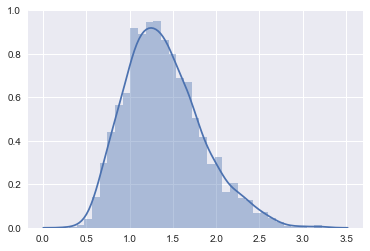

In [102]:
sns.distplot(Objective_score)

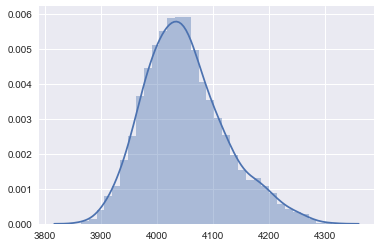

In [103]:
sns.distplot(Total_score)

In [104]:
import pandas as pd

data = pd.DataFrame(
    {
        'x' : Objective_score,
        'y' : Total_score
    }
)


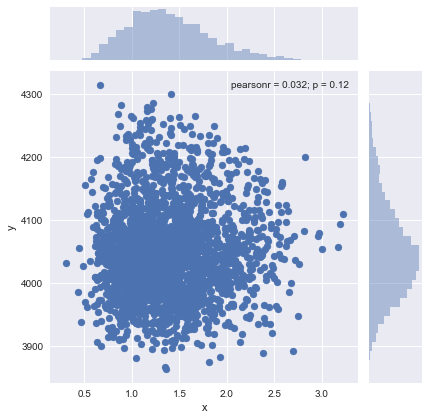

In [105]:
sns.jointplot(x="x",y="y",data=data)

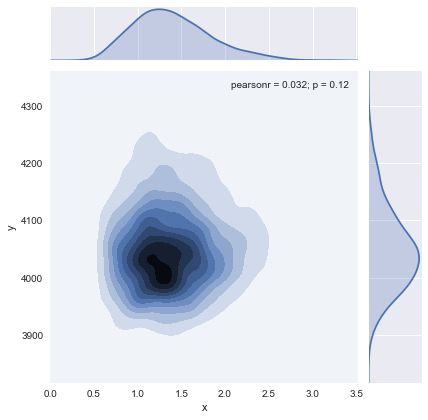

In [106]:
sns.jointplot(x="x",y="y",data=data, kind="kde")

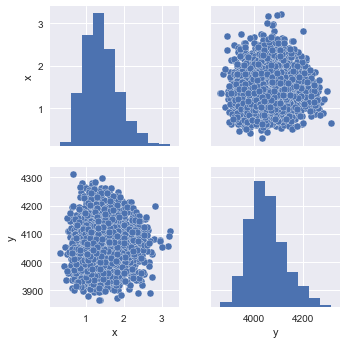

In [107]:
sns.pairplot(data)

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


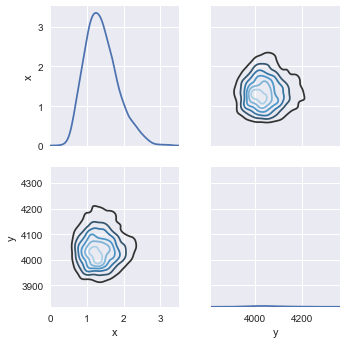

In [108]:
g= sns.PairGrid(data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,cmap="Blues_d",n_levels=6)

## Đội có tổng điểm cao nhất không phải là đội gần với Objective nhất 

### Greedy search khá dễ implement khi số students được chọn là nhỏ 
Tuy vậy khi k lớn cũng như số student được chọn lớn hơn, GAs có thể hoạt động tốt hơn 

In [40]:
no_selected_students = 3

In [77]:
class Individual :
    genes = np.zeros(k,dtype='b')
    fitness = 0
    
    def generate_individual(self):
        indices = np.random.randint(low=0,high=k,size=no_selected_students)
        self.genes[indices] = 1
    
    def fitness_value(self):
        return Objective(self.genes)

In [83]:
class Population:
    individuals = []
    
    def __init__(self,pol_size,init=True):
        self.individuals = [None] * pol_size
        if(init):
            for i in range (pol_size):
                g = Individual()
                g.generate_individual()
                individuals[i] = g
                
    def fittest_indi(self):
        fittest_individual = individuals[0]
        for i in range(len(individuals)):
            if(fittest_individual.fittess_value() <= 
               individuals[i].fitness_value()):
                fittest_individual = individuals[i]
        return fittest_individual
    
    def save_individual(self,index,indvd):
        self.individuals.insert(index,indvd)